In [16]:
import pandas as pd
import numpy as np

pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")

pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()

## Pré processamento para ML

In [17]:
var = ["Event", "Event_time"]
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event # data target with the patients that had HF before and after the first data collecting
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_train_X = pheno_train.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense  
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event # data target with the patients that had HF before and after the first data collecting
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_test_X = pheno_test.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense
# SMOTE -> used for unbalanced data sets 
# Synthetic Minority Over-sampling Technique
from collections import Counter
print('Original dataset shape %s' % Counter(pheno_train_y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
pheno_train_X, pheno_train_y = sm.fit_resample(pheno_train_X, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))
#pheno_test_X, pheno_test_y = sm.fit_resample(pheno_test_X, pheno_test_y)


Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


### StandadScaller

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pheno_train_X = scaler.fit_transform(pheno_train_X)
pheno_test_X = scaler.transform(pheno_test_X)

## Modelos de ML
#### Logistic Regression

Recall score:  0.4406779661016949


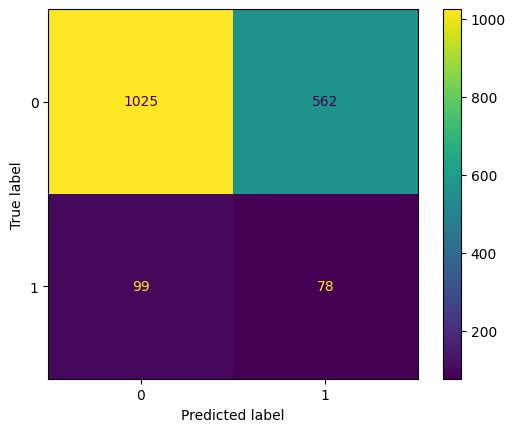

In [4]:
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(pheno_train_X, pheno_train_y)
logistic_prev = logistic.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, logistic_prev))
recal_log = recall_score(pheno_test_y, logistic_prev)
cm_logreg = confusion_matrix(pheno_test_y, logistic_prev, labels=logistic.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logistic.classes_)
disp1.plot()
plt.show()

#### Linear Regression

Recall score:  0.4576271186440678


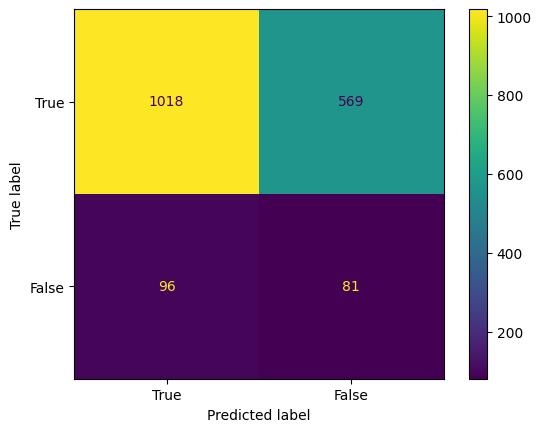

In [5]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

regr_model = linear_model.LinearRegression()
regr_model = regr_model.fit(pheno_train_X, pheno_train_y)
regr_model_pred = regr_model.predict(pheno_test_X)

regr_model_pred = np.round(regr_model_pred)

recall_lin_reg = recall_score(pheno_test_y, regr_model_pred)
print("Recall score: ", recall_score(pheno_test_y, regr_model_pred))
cm_linear = confusion_matrix(pheno_test_y, regr_model_pred)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=[True, False])
disp_linear.plot()
plt.show()

#### Ridge


Recall score:  0.4576271186440678


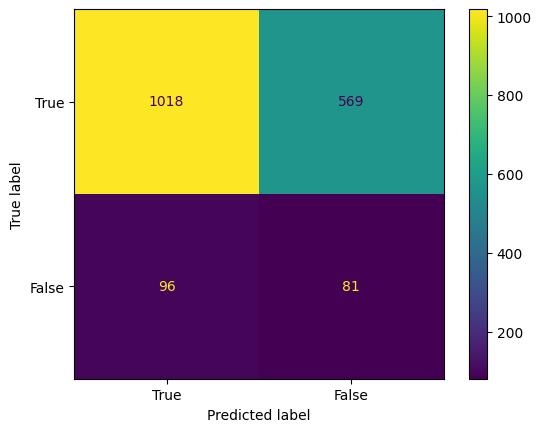

In [6]:
ridge = linear_model.Ridge(alpha=.1)
ridge = ridge.fit(pheno_train_X, pheno_train_y)
ridge_pred = ridge.predict(pheno_test_X)
ridge_pred = np.round(ridge_pred)

recall_ridge = recall_score(pheno_test_y, ridge_pred)
print("Recall score: ", recall_score(pheno_test_y, ridge_pred))
cm_ridge = confusion_matrix(pheno_test_y, ridge_pred)
disp_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_ridge, display_labels=[True, False])
disp_ridge.plot()
plt.show()

Lasso

Recall score:  0.5536723163841808


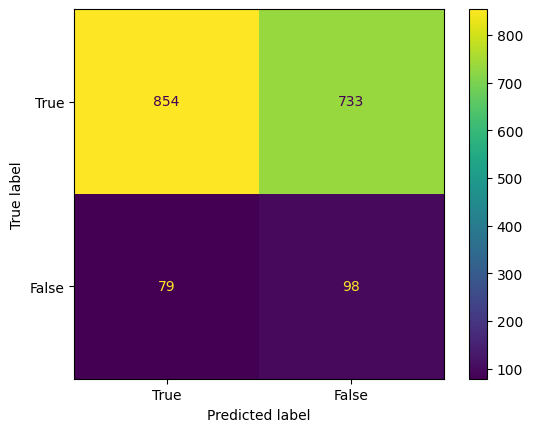

In [7]:
lasso = linear_model.Lasso()
lasso = lasso.fit(pheno_train_X, pheno_train_y)
lasso_pred = lasso.predict(pheno_test_X)
lasso_pred = np.round(lasso_pred)
print("Recall score: ", recall_score(pheno_test_y, lasso_pred))
recall_lasso = recall_score(pheno_test_y, lasso_pred)

cm_lasso = confusion_matrix(pheno_test_y, lasso_pred)
disp_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_lasso, display_labels=[True, False])
disp_lasso.plot()
plt.show()

#### SVM's

Recall score:  0.4971751412429379


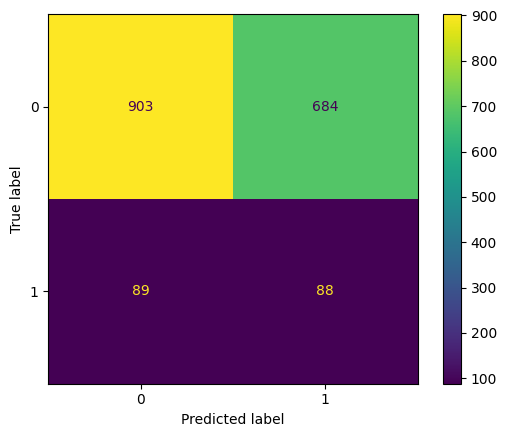

In [8]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
SVM = svm.SVC(gamma=0.001, C=100.)
SVM = SVM.fit(pheno_train_X, pheno_train_y)
svm_pred = SVM.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, svm_pred))
#cross_scores = cross_val_score(SVM, pheno_test_y, svm_pred, cv = 5)
#print(cross_scores)
recall_svm = recall_score(pheno_test_y, svm_pred)
cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels=SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=SVM.classes_)
disp_svm.plot()
plt.show()

#### KNeighborsClassifier

Recall score:  0.4180790960451977


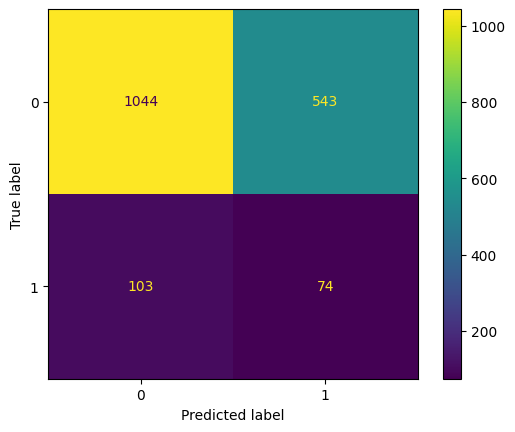

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(pheno_train_X, pheno_train_y)
knn_pred = knn.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, knn_pred))

recall_Knn = recall_score(pheno_test_y, knn_pred)
cm_knn = confusion_matrix(pheno_test_y, knn_pred, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()
plt.show()

#### Decision Tree

Recall score:  0.2598870056497175


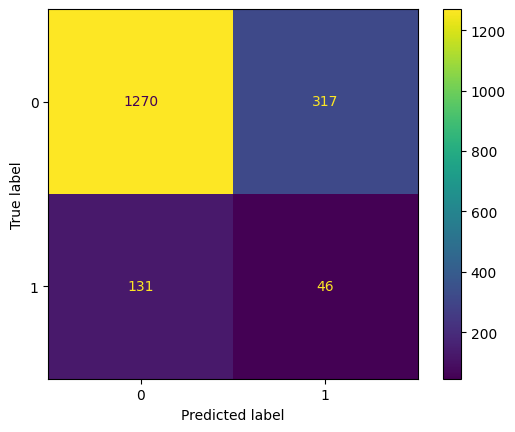

In [10]:
from sklearn import tree
from sklearn.metrics import f1_score

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(pheno_train_X, pheno_train_y)
preds_tree = tree_model.predict(pheno_test_X)

recall_dt = recall_score(pheno_test_y, preds_tree)
print("Recall score: ", recall_score(pheno_test_y, preds_tree))

cm_tree = confusion_matrix(pheno_test_y, preds_tree, labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot()
plt.show()

## Ensembles
#### Voting Classifier

In [11]:
from sklearn.ensemble import VotingClassifier
DTree = tree.DecisionTreeClassifier(max_depth=4)
knn_class = KNeighborsClassifier(n_neighbors=7)
svc = svm.SVC(gamma='scale', kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', DTree), ('knn', knn_class), ('svc', svc)], voting='hard')

eclf = eclf.fit(pheno_train_X, pheno_train_y)
print(eclf.score(pheno_test_X, pheno_test_y))

KeyboardInterrupt: 

In [11]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Random Forest Classifier

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, f1_score

rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

metrics = {'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score, average='weighted'),
           'precision': make_scorer(precision_score)}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(pheno_train_X, pheno_train_y)
print (rand_search.best_estimator_)
#report(rand_search.cv_results_)
print(rand_search.score(pheno_test_X, pheno_test_y))

RandomForestClassifier(bootstrap=False, max_features=4, min_samples_leaf=2)
0.14124293785310735


#### SVM Random Search

In [13]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 0.5, 1, 3, 10, 30, 100, 1000], 'gamma':[0.1, 0.01, 0.05, 0.001]}
svm_model_d = svm.SVC()
rand_search = RandomizedSearchCV(svm_model_d, param_distributions=parameters, n_iter=20, cv = 5)

rand_search.fit(pheno_train_X, pheno_train_y)

print (rand_search.best_estimator_)
report(rand_search.cv_results_)
print(rand_search.score(pheno_test_X, pheno_test_y))
# Demorou 31 min a correr


KeyboardInterrupt: 

In [15]:
scores = {"Models": ["Log", "DecTree", "KNN", "Lasso", "LenReg", "Ridge", "SVM"], "Recall scores": [recal_log, recall_dt, recall_Knn, recall_lasso, recall_lin_reg, recall_ridge, recall_svm]}
df = pd.DataFrame(scores)
df.sort_values(by=["Recall scores"], ascending=False)

"""
dt_fusion_recal - Decision Tree
logistic_fusion_recall - Logistic Regression
knn_fusion_recall - K Neighbors Classifier
recall_rf_fusion - Random Forest Classifier
recall_lin_reg - LinearRegression
recall_ridge - Ridge 
recall_lasso - Lasso
"""

,Models,Recall scores
3,Lasso,0.553672
6,SVM,0.497175
4,LenReg,0.457627
5,Ridge,0.457627
0,Log,0.440678
2,KNN,0.418079
1,DecTree,0.259887


### LazyPredict

In [29]:
pheno_test_y

0       0
1       0
2       1
3       0
4       0
       ..
1804    1
1805    0
1806    0
1807    0
1808    0
Length: 1764, dtype: int64

In [1]:
X_train = pheno_train_X[:,1].reshape(-1,1)
y_train = pheno_train_y[:,1].reshape(-1,1)

NameError: name 'pheno_train_X' is not defined

In [31]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.metrics import recall_score

clf = LazyRegressor(ignore_warnings=False, custom_metric= recall_score)

models,predictions = clf.fit(X_train, pheno_test_y, pheno_train_y, pheno_test_X)


 10%|▉         | 4/42 [00:00<00:00, 39.60it/s]

AdaBoostRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
BaggingRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
BayesianRidge model failed to execute
y_true and y_pred have different number of output (9!=1)
DecisionTreeRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
DummyRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
ElasticNet model failed to execute
y_true and y_pred have different number of output (9!=1)
ElasticNetCV model failed to execute
y_true and y_pred have different number of output (9!=1)
ExtraTreeRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)


 21%|██▏       | 9/42 [00:00<00:02, 15.37it/s]

ExtraTreesRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 29%|██▊       | 12/42 [00:03<00:13,  2.26it/s]

GaussianProcessRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
GradientBoostingRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)


 33%|███▎      | 14/42 [00:04<00:10,  2.58it/s]

HistGradientBoostingRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
HuberRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
KNeighborsRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)


 38%|███▊      | 16/42 [00:05<00:12,  2.16it/s]

KernelRidge model failed to execute
y_true and y_pred have different number of output (9!=1)
Lars model failed to execute
y_true and y_pred have different number of output (9!=1)
LarsCV model failed to execute
y_true and y_pred have different number of output (9!=1)
Lasso model failed to execute
y_true and y_pred have different number of output (9!=1)
LassoCV model failed to execute
y_true and y_pred have different number of output (9!=1)
LassoLars model failed to execute
y_true and y_pred have different number of output (9!=1)
LassoLarsCV model failed to execute
y_true and y_pred have different number of output (9!=1)
LassoLarsIC model failed to execute
y_true and y_pred have different number of output (9!=1)
LinearRegression model failed to execute
y_true and y_pred have different number of output (9!=1)
LinearSVR model failed to execute
y_true and y_pred have different number of output (9!=1)


 62%|██████▏   | 26/42 [00:06<00:02,  5.34it/s]

MLPRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)


 67%|██████▋   | 28/42 [00:06<00:03,  4.52it/s]

NuSVR model failed to execute
y_true and y_pred have different number of output (9!=1)
OrthogonalMatchingPursuit model failed to execute
y_true and y_pred have different number of output (9!=1)
OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(6314, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PassiveAggressiveRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
PoissonRegressor model failed to execute
y_true and y_pred have different number of output (9!=1)
